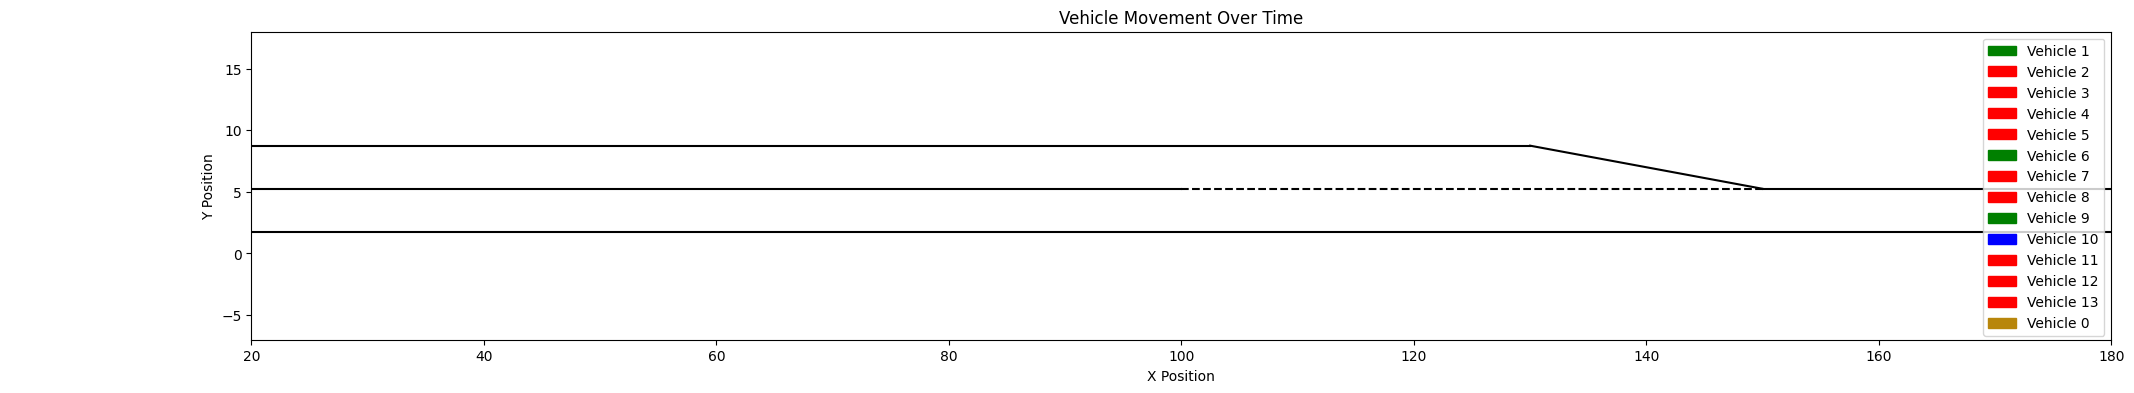

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.transforms as transforms
import numpy as np

# 读取CSV文件
df = pd.read_csv('/data/wangzm/merge/Merge-HighwayEnv-RL17/cut_in2/data/trajectory.csv')

# 创建图和轴
fig, ax = plt.subplots(figsize=(24, 4))

# 车辆的唯一标识符列表
vehicle_ids = df['vehicle-ID'].unique()

# 读取 CSV 文件
df2 = pd.read_csv('/data/wangzm/merge/Merge-HighwayEnv-RL17/cut_in2/data/trajectory.csv')
char_1_vehicles = df2[df2['label'] == 1]['vehicle-ID'].tolist()
length_1_vehicles = df2[df2['length'] == 11]['vehicle-ID'].tolist()

char_1_vehicles = [x for x in char_1_vehicles if x not in length_1_vehicles]

# # 初始化每个车辆的矩形对象（用于更新动画）
rectangles = {}
texts = {}


for vid in vehicle_ids:
    if vid == 0:
        color = 'darkgoldenrod'
        width, height = 5, 2  # 默认尺寸
    elif vid in length_1_vehicles:
        color = 'blue'
        width, height = 11, 2.5  # 设置为长度11，宽度2的矩形
    elif vid in char_1_vehicles:
        color = 'red'  # Choose a color for vehicles 1, 2, and 3
        width, height = 5, 2  # 默认尺寸    
    else:
        color = 'green'
        width, height = 5, 2  # 默认尺寸
    
    rect = Rectangle((0, 0), width, height, label=f'Vehicle {vid}', fill=True, color=color)
    ax.add_patch(rect)
    rectangles[vid] = rect

    text = ax.text(0, 0, str(vid), color='white', ha='center', va='center')
    texts[vid] = text

# 设置坐标轴
ax.set_xlim(20, 180)
# ax.set_ylim(df['y'].min() - 10, df['y'].max() + 10)
ax.set_ylim(-7,18)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Vehicle Movement Over Time')
ax.legend()

# 在纵坐标为0的位置画一条贯穿整个横坐标的实线
ax.axhline(y=1.75, color='black', linestyle='-')

# 在纵坐标为3.5的位置画指定的线条
ax.plot([0, 100], [5.25, 5.25], color='black', linestyle='-')   # 实线
ax.plot([100, 150], [5.25, 5.25], color='black', linestyle='--') # 虚线
ax.plot([150, 250], [5.25, 5.25], color='black', linestyle='-')  # 实线
ax.plot([0, 130], [8.75, 8.75], color='black', linestyle='-')
ax.plot([130, 150], [8.75, 5.25], color='black', linestyle='-')    # 实线

# 初始化动画函数：清空矩形的位置和角度
def init():
    for rect in rectangles.values():
        rect.set_xy((0, 0))
        rect.angle = 0
    for text in texts.values():
        text.set_position((0, 0))
    return list(rectangles.values()) + list(texts.values())

# 更新动画的函数
def update(frame):
    time = df['time'].unique()[frame]
    current_df = df[df['time'] == time]
    for vid in vehicle_ids:
        vehicle_data = current_df[current_df['vehicle-ID'] == vid]
        if not vehicle_data.empty:
            x = vehicle_data['x'].values[0]
            y = vehicle_data['y'].values[0]
            
            heading = vehicle_data['heading'].values[0]
            heading = np.degrees(heading)
            rect = rectangles[vid]
            
            # 中心对齐
            rect_center_x = x - rect.get_width() / 2
            rect_center_y = y - rect.get_height() / 2
            
            # 更新矩形的位置和角度
            rect.set_xy((rect_center_x, rect_center_y))
            trans = transforms.Affine2D().rotate_deg_around(x, y, heading) + ax.transData
            rect.set_transform(trans)

            # 更新文本的位置
            text = texts[vid]
            text.set_position((x, y))
    return list(rectangles.values()) + list(texts.values())

# 创建动画
ani = FuncAnimation(fig, update, frames=len(df['time'].unique()), init_func=init, blit=True, interval=100)

# 显示动画
plt.show()

HTML(ani.to_html5_video())

